# Movies - Model Testing

In [8]:
import plotly.express as px
import pandas as pd
import numpy as np
import random

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [9]:
df = pd.read_parquet("../data/movies-clean.parquet.gzip")
df.head()

,RATING,VOTES,RunTime,TYPE,Year_From,Year_To,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,...,Director_Àlex Pastor,Director_Álex de la Iglesia,Director_Álvaro Brechner,Director_Álvaro Fernández Armero,Director_Álvaro Longoria,Director_Ángel Gómez Hernández,Director_Ángeles Reiné,Director_Åke Sandgren,Director_Óscar Pedraza,Director_Ömer Ugur
0,6.1,21062,121.0,Movie,2021,2021,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,17870,25.0,Series,2021,2021,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8.2,885805,44.0,Series,2010,2022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,414849,23.0,Series,2013,2013,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7.6,25858,50.0,Series,2020,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Descriptive Analysis

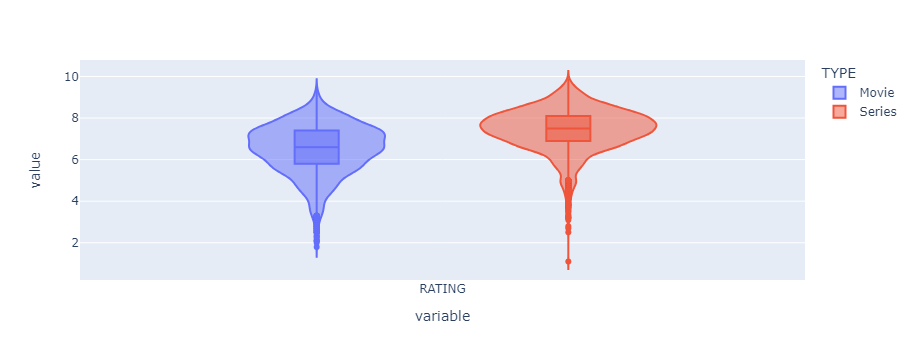

In [10]:
fig = px.violin(df, y=['RATING'],
                color="TYPE",
                box=True)
fig.show()

In [11]:
df[["RATING"]].describe()

,RATING
count,8168.000000
mean,6.921658
std,1.219852
min,1.100000
25%,6.200000
50%,7.100000
75%,7.800000
max,9.900000


## Actual Data

In [12]:
actual = df["RATING"]

## Random Prediction

In [15]:
y_pred = []
for i in range(0, df.shape[0]):
    n = random.randint(1,10)
    y_pred.append(n)

mae = mean_absolute_error(actual, y_pred)
mse = mean_squared_error(actual, y_pred, squared=True)
rmse = mean_squared_error(actual, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

MAE: 2.8492531831537713
RMSE: 3.428087125762959
MSE: 11.751781341821744


## Random Prediction (6, 8)

In [16]:
y_pred = []
for i in range(0, df.shape[0]):
    n = random.randint(6, 8)
    y_pred.append(n)

mae = mean_absolute_error(actual, y_pred)
mse = mean_squared_error(actual, y_pred, squared=True)
rmse = mean_squared_error(actual, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

MAE: 1.1816478942213517
RMSE: 1.4807427755970515
MSE: 2.19259916748286


## Rating: 6.92

In [18]:
y_pred = df.shape[0] * [6.9]

mae = mean_absolute_error(actual, y_pred)
mse = mean_squared_error(actual, y_pred, squared=True)
rmse = mean_squared_error(actual, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

MAE: 0.9589005876591576
RMSE: 1.2199698339264375
MSE: 1.4883263956904995


## Movies: 6.6 / Series: 7.5

In [24]:
df["prediction"] = np.where(df["TYPE"] == "Movie", 6.6, 7.5)
y_pred = df["prediction"]

mae = mean_absolute_error(actual, y_pred)
mse = mean_squared_error(actual, y_pred, squared=True)
rmse = mean_squared_error(actual, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

MAE: 0.8696498530852106
RMSE: 1.132675686839484
MSE: 1.2829542115572967
